C:\Users\ridva\AppData\Local\Temp\ipykernel_30680\1710352503.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Random Forest Test RMSE: 13.02659097570955


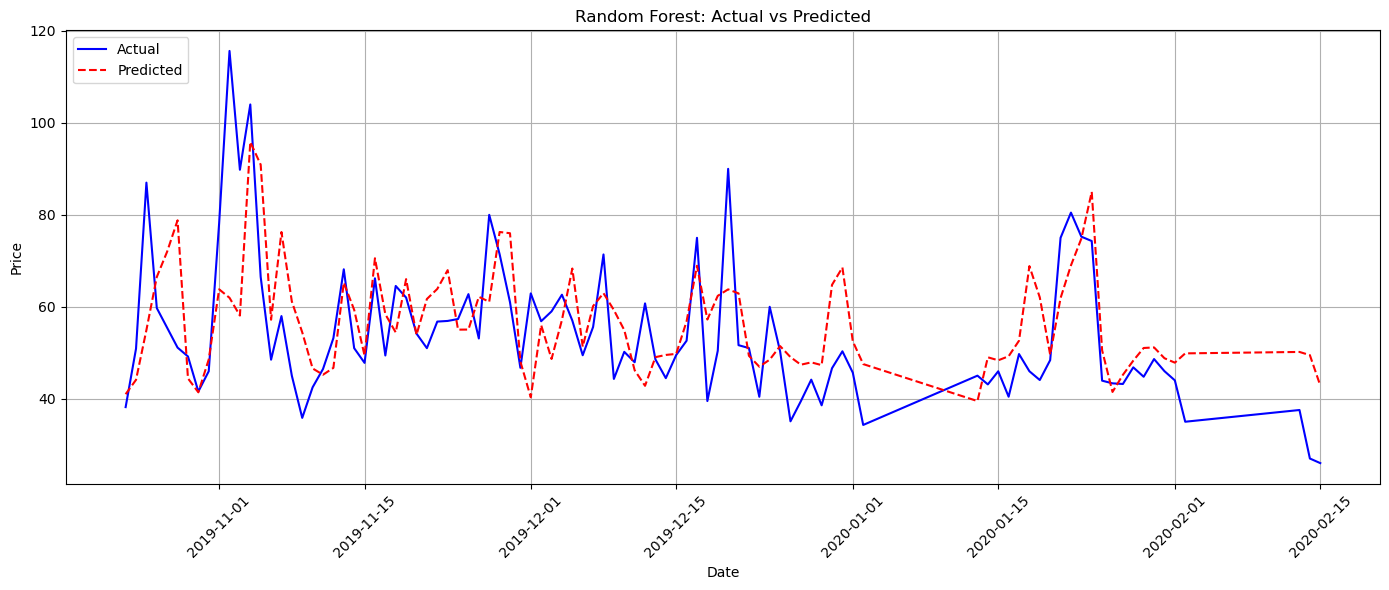

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('reshaped_dataset_corrected-2018-2020.csv')

# Convert 'Date' to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] <= '2020-02-15']  # Filtering the dates up to 15.02.2020
df.sort_values(by='Date', inplace=True)

# Generate lag features
for i in range(1, 8):
    df[f'Price_Lag_{i}'] = df['Day-ahead Price [EUR/MWh]'].shift(i)
    df[f'Wind_Lag_{i}'] = df['Wind Offshore  [MW] Day Ahead'].shift(i)

df.dropna(inplace=True)

# Splitting the dataset
n_train_hours = int(len(df) * 0.8)
train, test = df.iloc[:n_train_hours, :], df.iloc[n_train_hours:, :]

# Separating the target variable
train_X, train_y = train.drop(columns=['Day-ahead Price [EUR/MWh]', 'Date']), train['Day-ahead Price [EUR/MWh]']
test_X, test_y = test.drop(columns=['Day-ahead Price [EUR/MWh]', 'Date']), test['Day-ahead Price [EUR/MWh]']

# Scaling
scaler_X = StandardScaler().fit(train_X)
train_X_scaled = scaler_X.transform(train_X)
test_X_scaled = scaler_X.transform(test_X)

scaler_y = StandardScaler().fit(train_y.values.reshape(-1, 1))
train_y_scaled = scaler_y.transform(train_y.values.reshape(-1, 1)).ravel()
test_y_scaled = scaler_y.transform(test_y.values.reshape(-1, 1)).ravel()

# Model definition and training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_X_scaled, train_y_scaled)

# Prediction
yhat_scaled_rf = rf.predict(test_X_scaled)
inv_yhat_rf = scaler_y.inverse_transform(yhat_scaled_rf.reshape(-1, 1))

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(test_y, inv_yhat_rf))
print('Random Forest Test RMSE:', rmse_rf)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Date': test['Date'],
    'Actual': test_y.values,
    'Predicted': inv_yhat_rf.ravel()
})

# Sort the DataFrame by Date
plot_df.sort_values(by='Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual', color='blue')
plt.plot(plot_df['Date'], plot_df['Predicted'], label='Predicted', color='red', linestyle='dashed')
plt.title('Random Forest: Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ridva\AppData\Local\Temp\ipykernel_30680\2924942367.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Gradient Boosting Test RMSE: 13.742332256957436


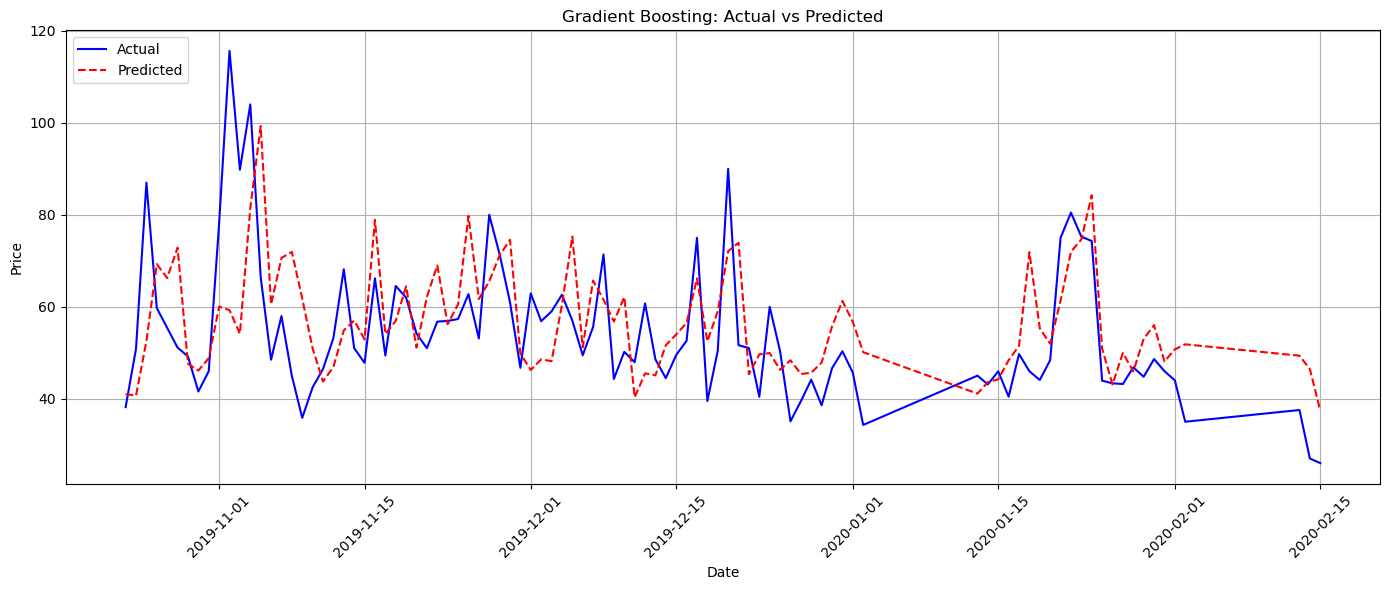

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('reshaped_dataset_corrected-2018-2020.csv')

# Convert 'Date' to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] <= '2020-02-15']  # Filtering dates up to 15.02.2020
df.sort_values(by='Date', inplace=True)

# Generate lag features for the target variable and the wind offshore power prediction
for i in range(1, 8):
    df[f'Price_Lag_{i}'] = df['Day-ahead Price [EUR/MWh]'].shift(i)
    df[f'Wind_Lag_{i}'] = df['Wind Offshore  [MW] Day Ahead'].shift(i)

df.dropna(inplace=True)

# Splitting the dataset
n_train_hours = int(len(df) * 0.8)
train, test = df.iloc[:n_train_hours, :], df.iloc[n_train_hours:, :]

# Separating the target variable
train_X, train_y = train.drop(columns=['Day-ahead Price [EUR/MWh]', 'Date']), train['Day-ahead Price [EUR/MWh]']
test_X, test_y = test.drop(columns=['Day-ahead Price [EUR/MWh]', 'Date']), test['Day-ahead Price [EUR/MWh]']

# Scaling the dataset
scaler_X = StandardScaler().fit(train_X)
train_X_scaled = scaler_X.transform(train_X)
test_X_scaled = scaler_X.transform(test_X)

scaler_y = StandardScaler().fit(train_y.values.reshape(-1, 1))
train_y_scaled = scaler_y.transform(train_y.values.reshape(-1, 1)).ravel()
test_y_scaled = scaler_y.transform(test_y.values.reshape(-1, 1)).ravel()

# Model definition and training
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(train_X_scaled, train_y_scaled)

# Prediction
yhat_scaled_gbr = gbr.predict(test_X_scaled)
inv_yhat_gbr = scaler_y.inverse_transform(yhat_scaled_gbr.reshape(-1, 1))

# Evaluation
rmse_gbr = np.sqrt(mean_squared_error(test_y, inv_yhat_gbr))
print('Gradient Boosting Test RMSE:', rmse_gbr)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Date': test['Date'],
    'Actual': test_y.values,
    'Predicted': inv_yhat_gbr.ravel()
})

# Sort the DataFrame by Date
plot_df.sort_values(by='Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual', color='blue')
plt.plot(plot_df['Date'], plot_df['Predicted'], label='Predicted', color='red', linestyle='dashed')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ridva\AppData\Local\Temp\ipykernel_30680\1578527892.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


SVR Test RMSE: 13.266411170484995


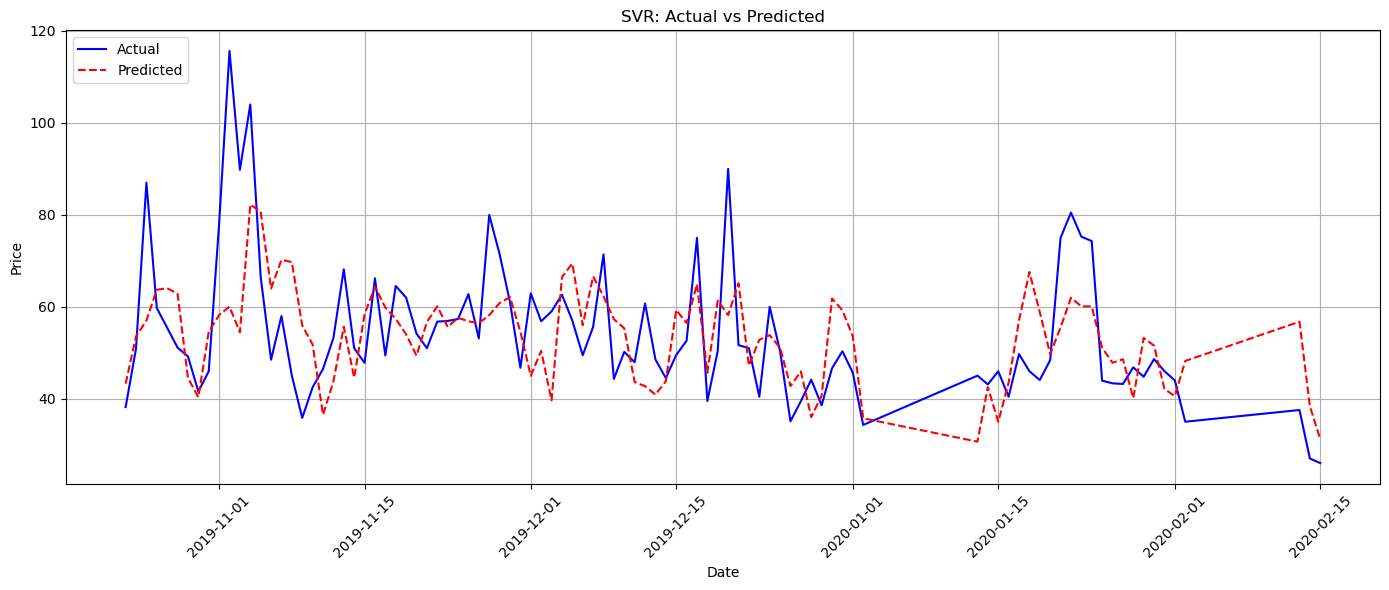

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('reshaped_dataset_corrected-2018-2020.csv')

# Convert 'Date' to datetime and filter by date range
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] <= '2020-02-15']  # Filtering dates up to 15.02.2020
df.sort_values(by='Date', inplace=True)

# Generate lag features
for i in range(1, 8):
    df[f'Price_Lag_{i}'] = df['Day-ahead Price [EUR/MWh]'].shift(i)
    df[f'Wind_Lag_{i}'] = df['Wind Offshore  [MW] Day Ahead'].shift(i)

df.dropna(inplace=True)

# Splitting the dataset
n_train_hours = int(len(df) * 0.8)
train, test = df.iloc[:n_train_hours, :], df.iloc[n_train_hours:, :]

# Separating the target variable
train_X, train_y = train.drop(columns=['Day-ahead Price [EUR/MWh]', 'Date']), train['Day-ahead Price [EUR/MWh]']
test_X, test_y = test.drop(columns=['Day-ahead Price [EUR/MWh]', 'Date']), test['Day-ahead Price [EUR/MWh]']

# Scaling the dataset
scaler_X = StandardScaler().fit(train_X)
train_X_scaled = scaler_X.transform(train_X)
test_X_scaled = scaler_X.transform(test_X)

scaler_y = StandardScaler().fit(train_y.values.reshape(-1, 1))
train_y_scaled = scaler_y.transform(train_y.values.reshape(-1, 1)).ravel()
test_y_scaled = scaler_y.transform(test_y.values.reshape(-1, 1)).ravel()

# Model definition and training
svr = SVR(kernel='linear')
svr.fit(train_X_scaled, train_y_scaled)

# Prediction
yhat_scaled_svr = svr.predict(test_X_scaled)
inv_yhat_svr = scaler_y.inverse_transform(yhat_scaled_svr.reshape(-1, 1))

# Evaluation
rmse_svr = np.sqrt(mean_squared_error(test_y, inv_yhat_svr))
print('SVR Test RMSE:', rmse_svr)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Date': test['Date'],
    'Actual': test_y.values,
    'Predicted': inv_yhat_svr.ravel()
})

# Sort the DataFrame by Date
plot_df.sort_values(by='Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual', color='blue')
plt.plot(plot_df['Date'], plot_df['Predicted'], label='Predicted', color='red', linestyle='dashed')
plt.title('SVR: Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ridva\AppData\Local\Temp\ipykernel_30680\1733017533.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


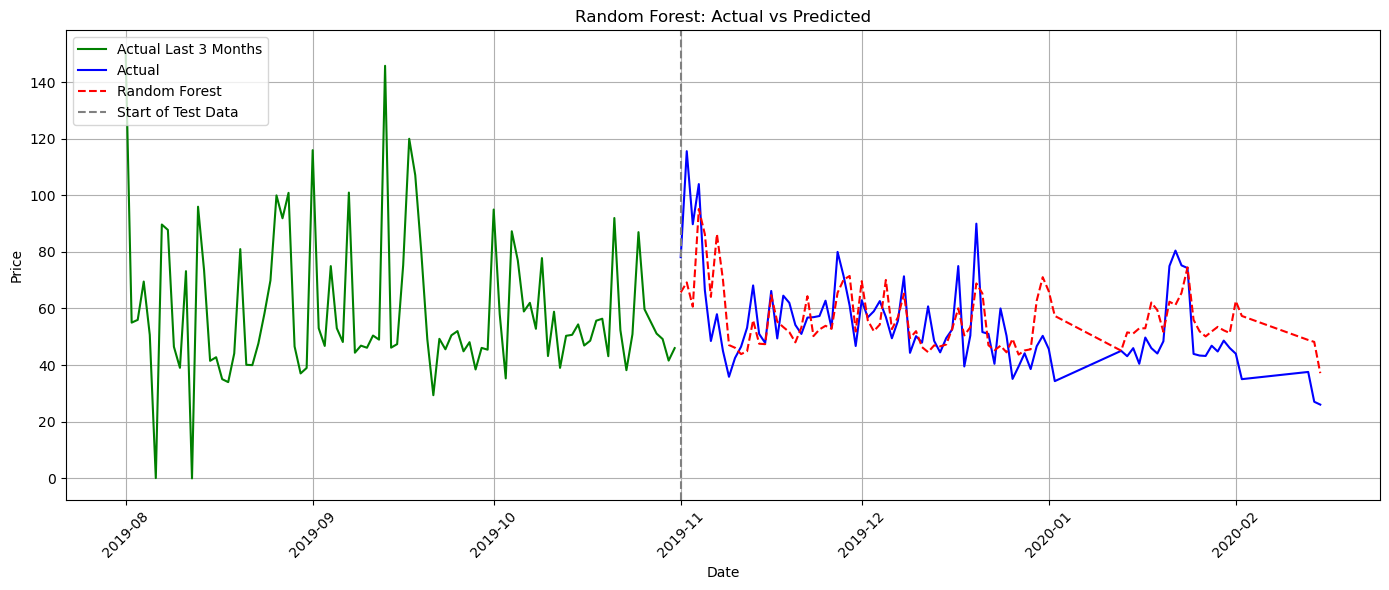

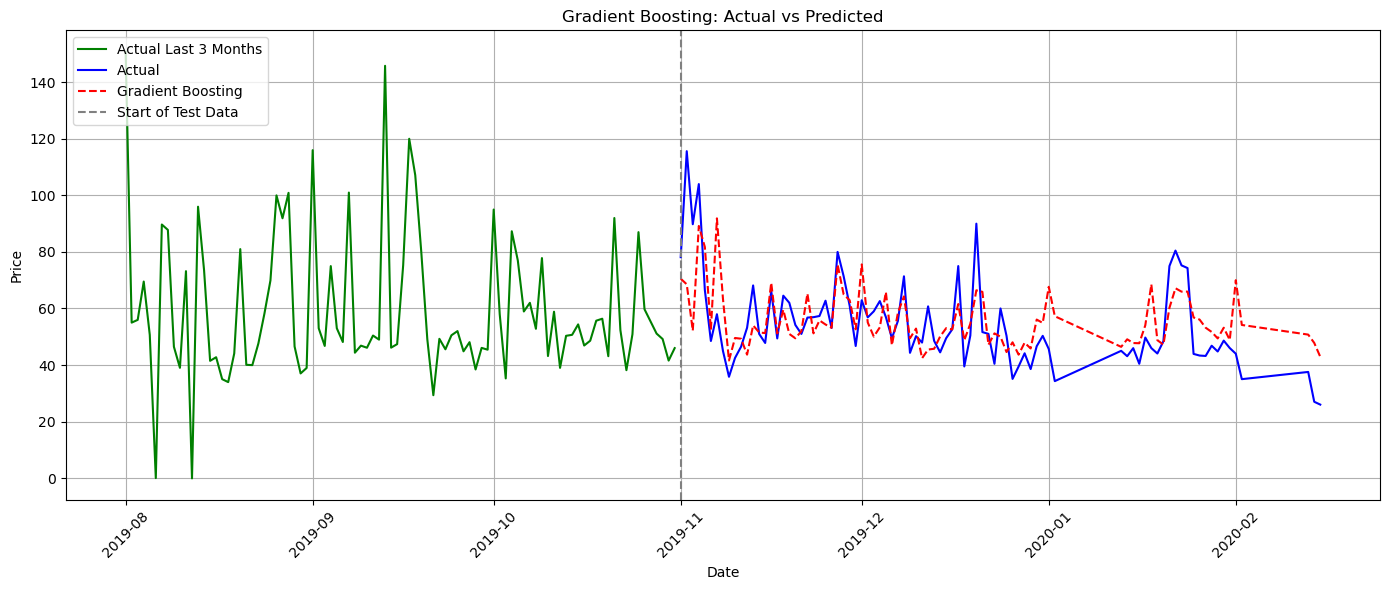

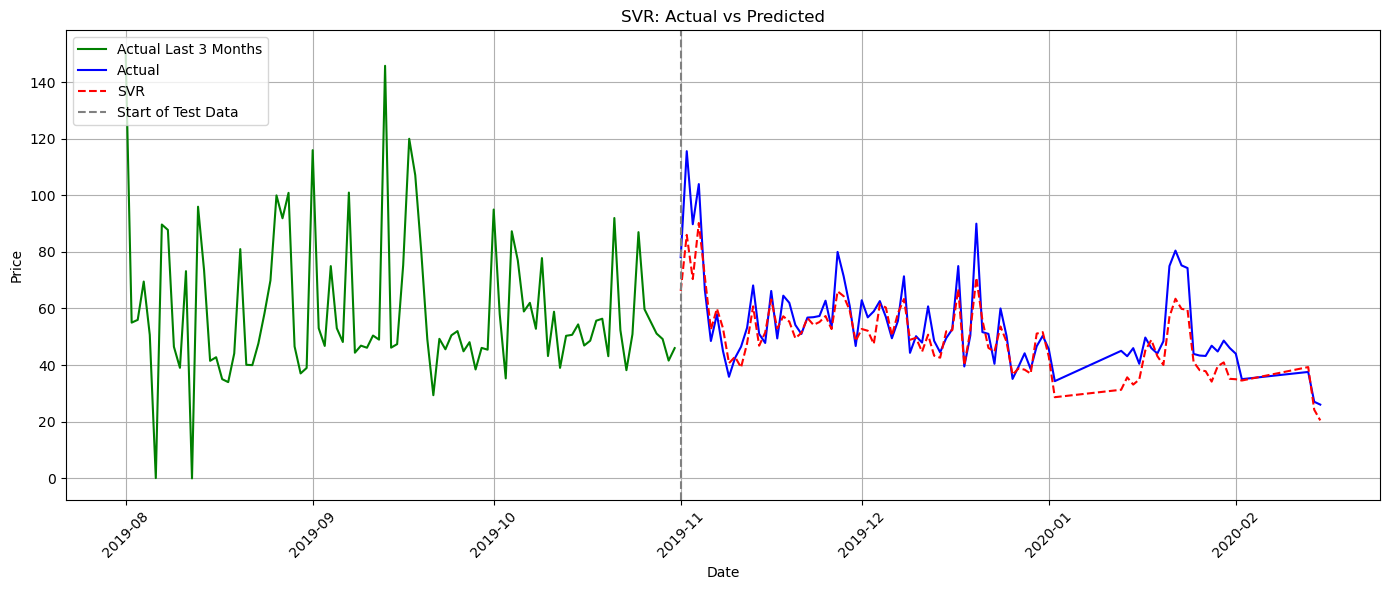

{'Random Forest RMSE': 12.563069440951164,
 'Gradient Boosting RMSE': 12.520450045000947,
 'SVR RMSE': 8.049482611416941}

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('reshaped_dataset_corrected-2018-2020.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')  # Ensure data is sorted

# Generate features
for i in range(1, 8):
    df[f'Price_Lag_{i}'] = df['Day-ahead Price [EUR/MWh]'].shift(i)
    df[f'Wind_Lag_{i}'] = df['Wind Offshore  [MW] Day Ahead'].shift(i)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Rolling_Mean_Price'] = df['Day-ahead Price [EUR/MWh]'].rolling(window=7).mean()
df['Rolling_Mean_Wind'] = df['Wind Offshore  [MW] Day Ahead'].rolling(window=7).mean()
df.dropna(inplace=True)

# Define the training and test split to include the last three months before 2019-11-01 in the training data
three_months_before = '2019-08-01'
train_before = df[df['Date'] < three_months_before]
train_last_3_months = df[(df['Date'] >= three_months_before) & (df['Date'] < '2019-11-01')]
test = df[df['Date'] >= '2019-11-01']
train = pd.concat([train_before, train_last_3_months])

# Define features and target variable
features = [col for col in df.columns if col not in ['Day-ahead Price [EUR/MWh]', 'Date']]
train_X, train_y = train[features], train['Day-ahead Price [EUR/MWh]']

# Scale the data
scaler_X = StandardScaler().fit(train_X)
train_X_scaled = scaler_X.transform(train_X)

# Train the models
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(train_X_scaled, train_y)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(train_X_scaled, train_y)
svr = SVR(kernel='linear').fit(train_X_scaled, train_y)

# Filter the test data to not exceed 15/02/2020
test = test[test['Date'] <= '2020-02-15']

# Generate predictions for the updated test data and the last three months of training data
test_X = scaler_X.transform(test[features])
yhat_rf_test = rf.predict(test_X)
yhat_gbr_test = gbr.predict(test_X)
yhat_svr_test = svr.predict(test_X)

# Convert the string date to a datetime object for plotting
date_line = pd.to_datetime('2019-11-01')



# Random Forest
plt.figure(figsize=(14, 6))
plt.plot(train_last_3_months['Date'], train_last_3_months['Day-ahead Price [EUR/MWh]'], label='Actual Last 3 Months', color='green')
plt.plot(test['Date'], test['Day-ahead Price [EUR/MWh]'], label='Actual', color='blue')
plt.plot(test['Date'], yhat_rf_test, label='Random Forest', linestyle='dashed', color='red')
plt.axvline(x=date_line, color='grey', linestyle='--', label='Start of Test Data')
plt.title('Random Forest: Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gradient Boosting
plt.figure(figsize=(14, 6))
plt.plot(train_last_3_months['Date'], train_last_3_months['Day-ahead Price [EUR/MWh]'], label='Actual Last 3 Months', color='green')
plt.plot(test['Date'], test['Day-ahead Price [EUR/MWh]'], label='Actual', color='blue')
plt.plot(test['Date'], yhat_gbr_test, label='Gradient Boosting', linestyle='dashed', color='red')
plt.axvline(x=date_line, color='grey', linestyle='--', label='Start of Test Data')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# SVR
plt.figure(figsize=(14, 6))
plt.plot(train_last_3_months['Date'], train_last_3_months['Day-ahead Price [EUR/MWh]'], label='Actual Last 3 Months', color='green')
plt.plot(test['Date'], test['Day-ahead Price [EUR/MWh]'], label='Actual', color='blue')
plt.plot(test['Date'], yhat_svr_test, label='SVR', linestyle='dashed', color='red')
plt.axvline(x=date_line, color='grey', linestyle='--', label='Start of Test Data')
plt.title('SVR: Actual vs Predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




# RMSE calculations for the updated test data
rmse_rf_updated = np.sqrt(mean_squared_error(test['Day-ahead Price [EUR/MWh]'], yhat_rf_test))
rmse_gbr_updated = np.sqrt(mean_squared_error(test['Day-ahead Price [EUR/MWh]'], yhat_gbr_test))
rmse_svr_updated = np.sqrt(mean_squared_error(test['Day-ahead Price [EUR/MWh]'], yhat_svr_test))

rmse_values_updated = {
    "Random Forest RMSE": rmse_rf_updated,
    "Gradient Boosting RMSE": rmse_gbr_updated,
    "SVR RMSE": rmse_svr_updated
}

rmse_values_updated
